**Author: Gauransh Shukla**

**Task 3: Exploratory Data Analysis- Retail**

**Problem: Perform EDA on dataset 'Sample Superstore'**



**Dataset: https://bit.ly/3i4rbWl**

In [60]:
#importing the useful libraries

import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [61]:
#Reading the data 
data = pd.read_csv('/content/SampleSuperstore.csv')

In [63]:
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [65]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [66]:
#nunique() function return number of unique elements in the object. It returns a scalar value which is the count of all the unique values in the Index.
for i in data.columns:
    print(i,data[i].nunique())

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


**Understanding the Data :**

In United States, A Superstore suplies 3 Categories - Furniture, Office Supplies and Technology consists of 17 subcategories in 4 Regions where items are shipped in 532 cities of 49 States to 3 Segments - 'Consumer', 'Corporate' and 'Home Office' with Shipping facilities of 'Second Class','Standard Class', 'First Class', 'Same Day'.






As we know, Superstore is based in United States, It's better to **remove** the columns which would not create any impact whilst exploring the Data. So, We can drop 'Country', 'Postal Code' from the dataset.

In [67]:
data.drop(['Country', 'Postal Code'], axis = 1, inplace = True)

**UNIVARIATE ANALYSIS**

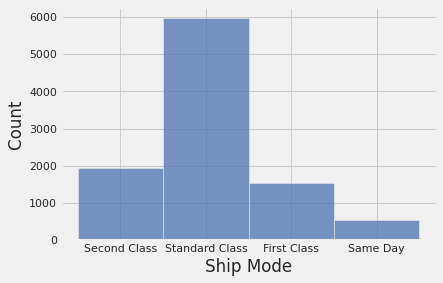

In [68]:
sns.histplot(data['Ship Mode'])

**Conclusion : 'Standard Shipping' mode is highly preferred whersas 'Same Day' is least**

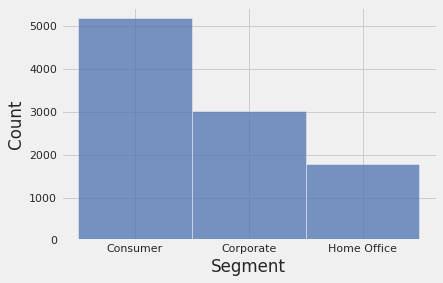

In [69]:
sns.histplot(data['Segment'])

**Conclusion : 50% of people belong to consumer class whereas 20-30% people belong to Home Office & Corporate**

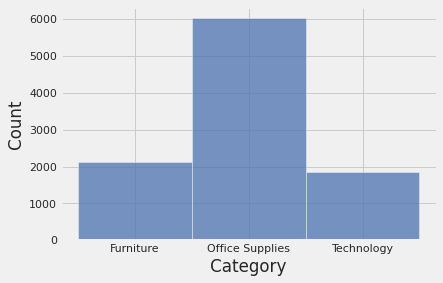

In [70]:
sns.histplot(data['Category'])

**Conclusion : 60% of the Categories belong to Office Supplies whereas approximately 20 - 20% of Categories belongs to Furniture and Technology**

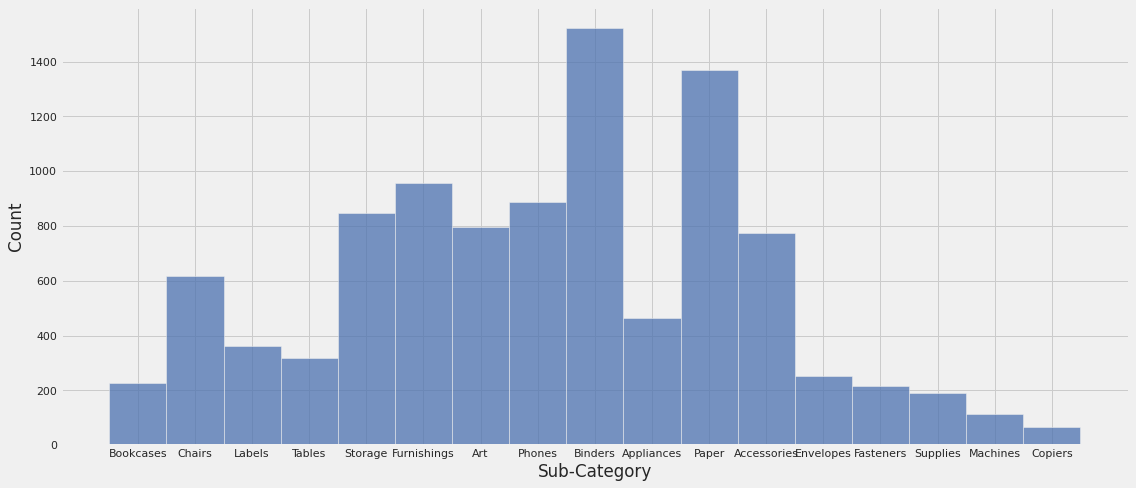

In [71]:
sns.histplot(data['Sub-Category'])
plt.gcf().set_size_inches(16,7)
plt.tight_layout()

**Conclusion : Binders and Papers are the most exisiting Sub-Category in Superstore**

**Bivariate Analysis**

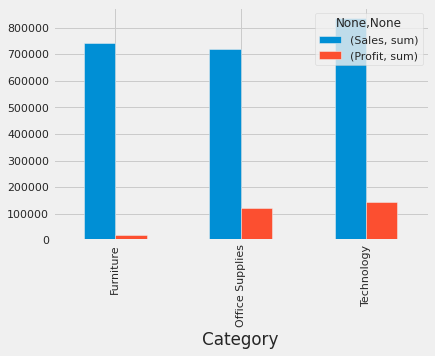

In [72]:
data.groupby('Category')[['Sales', 'Profit']].agg(['sum']).plot.bar()

From this Graph, We can conclude that:

1. Techology Products has the highest Sales and Profit

2. Furniture has moderate Sales but less Profit
3. Office Suplies has the least Sales but moderate Profit

In [58]:
top6_subcategories = ['Binders','Paper','Furnishings','Phones','Storage','Art']
region_subCategories_df = data.groupby(['Region','Sub-Category']).size().unstack()
region_subCategories_df = region_subCategories_df[top6_subcategories]
region_subCategories_df

Sub-Category,Binders,Paper,Furnishings,Phones,Storage,Art
Region,,,,,,
Central,366,321,205,200,210,176
East,440,378,283,272,242,228
South,246,221,165,140,128,142
West,471,450,304,277,266,250


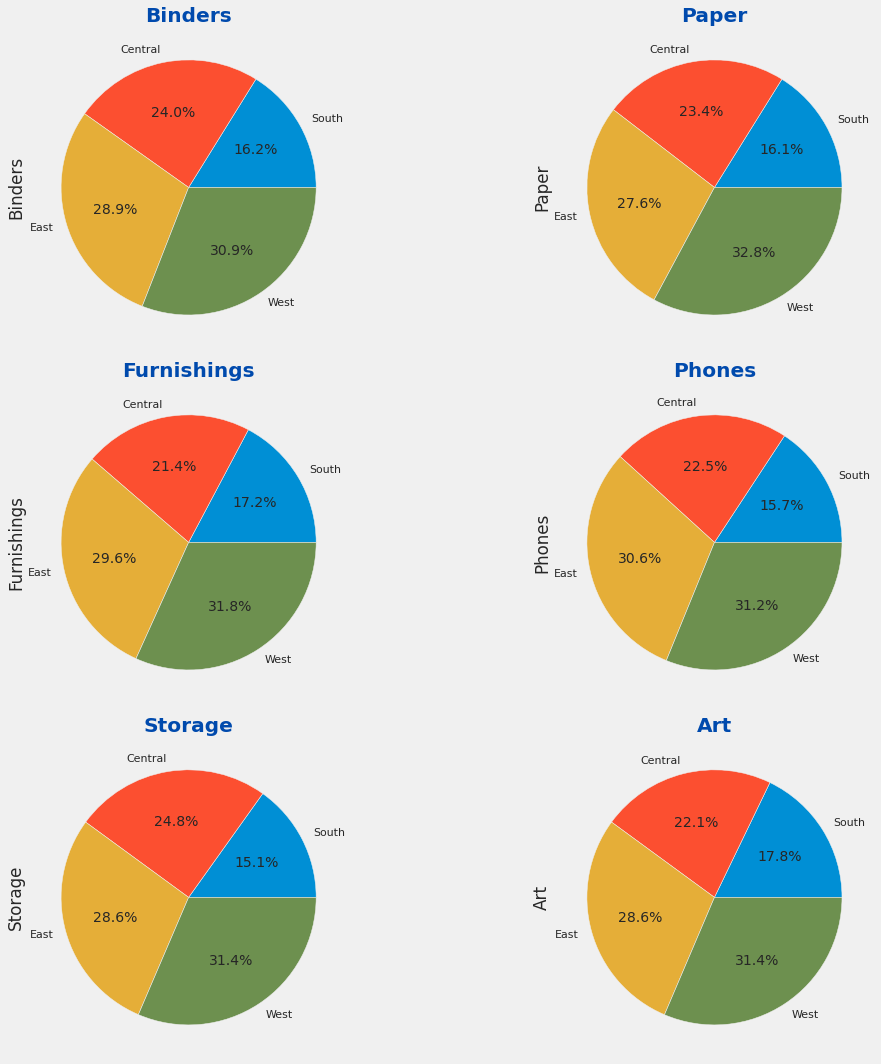

In [59]:
import matplotlib as mpl
mpl.style.use('fivethirtyeight')
col_number = 2
row_number = 3
txt = {'weight' : 'bold'}
fig, axes = plt.subplots(row_number,col_number)

for i, (label,col) in enumerate(region_subCategories_df.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)
    col.plot(kind='pie', ax=ax, autopct = '%1.1f%%' )
    ax.set_title(label, color = '#004aad', fontdict = txt)
    
plt.gcf().set_size_inches(18, 15)
plt.tight_layout()

In [32]:
top6_subcategories = ['Binders','Paper','Furnishings','Phones','Storage','Art']
region_subCategories_df = data.groupby(['State','Sub-Category']).size().unstack()
region_subCategories_df = region_subCategories_df[top6_subcategories]
region_subCategories_df.head()

Sub-Category,Binders,Paper,Furnishings,Phones,Storage,Art
State,,,,,,
Alabama,10.0,8.0,3.0,6.0,3.0,7.0
Arizona,35.0,31.0,21.0,23.0,21.0,14.0
Arkansas,10.0,12.0,5.0,4.0,2.0,6.0
California,276.0,289.0,191.0,172.0,160.0,165.0
Colorado,28.0,19.0,24.0,16.0,13.0,11.0


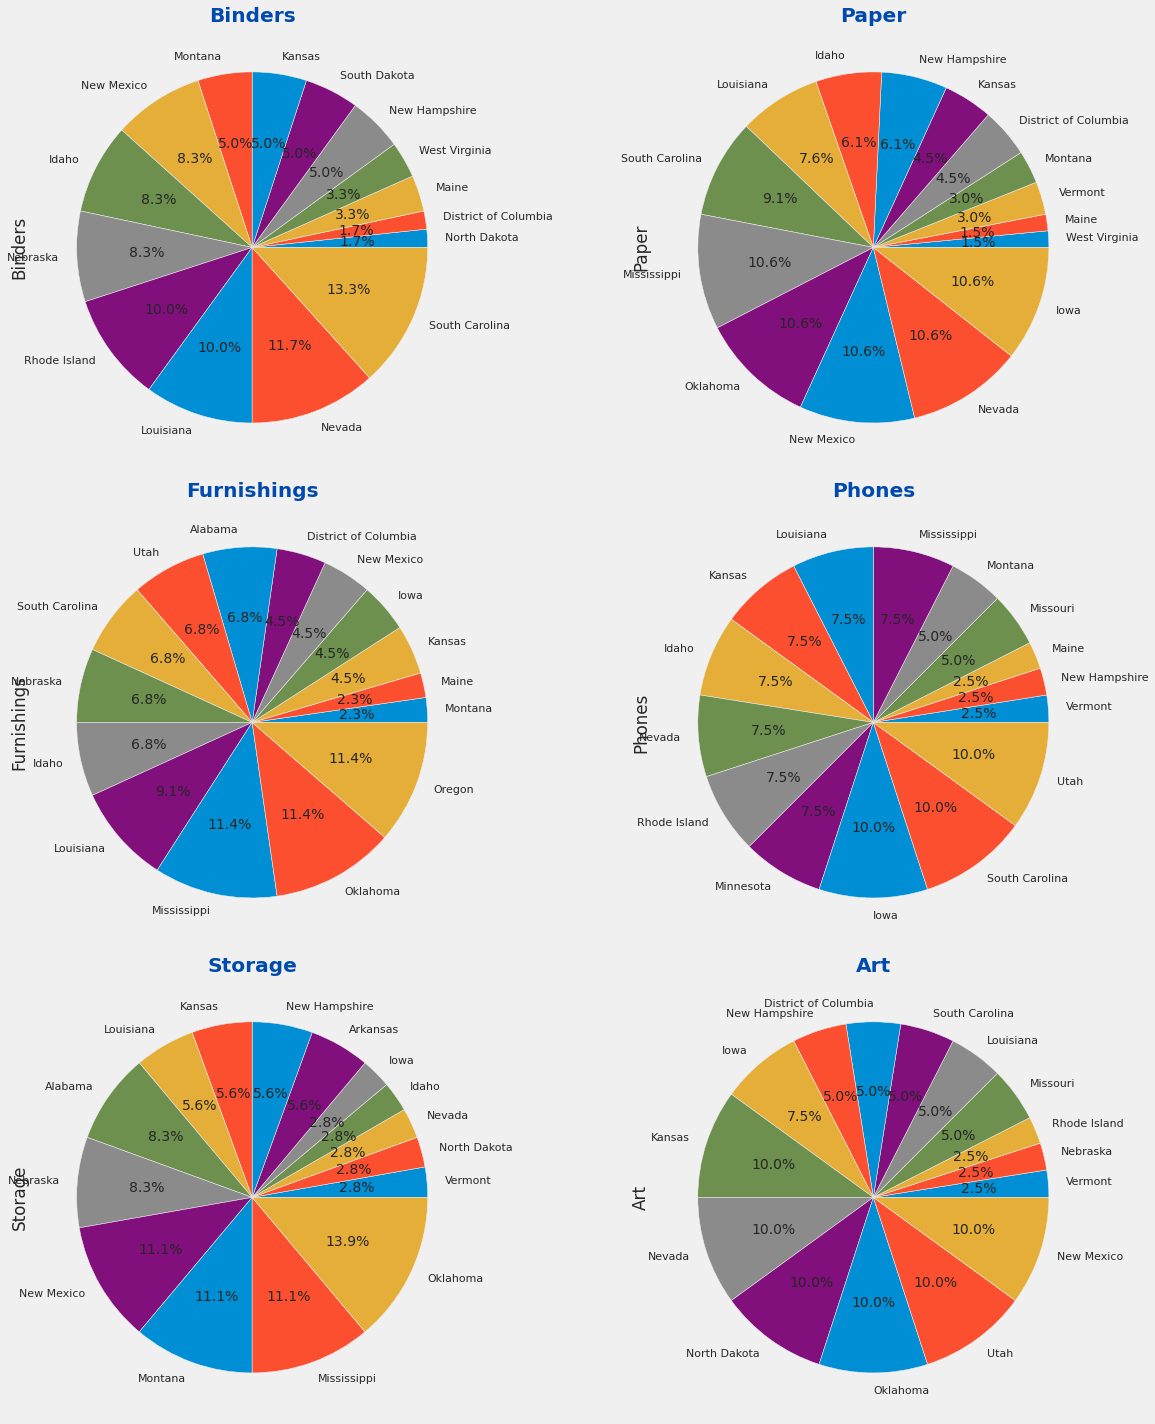

In [33]:
import matplotlib as mpl
mpl.style.use('fivethirtyeight')
col_number = 2
row_number = 3
txt = {'weight' : 'bold'}
fig, axes = plt.subplots(row_number,col_number)

for i, (label,col) in enumerate(region_subCategories_df.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='pie', ax=ax, autopct = '%1.1f%%' )
    ax.set_title(label, color = '#004aad', fontdict = txt)
    
plt.gcf().set_size_inches(18,20)
plt.tight_layout()

In [45]:
data.pivot_table(values =  'Profit', index = 'Segment', columns = 'Discount')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,64.161707,93.630090,15.744638,22.426571,-48.018291,-102.708631,-93.462041,-216.651900,-253.572181,-38.639822,-106.962433,-115.213404
Corporate,71.584290,99.802956,49.282143,23.157672,-46.241380,-82.702010,-132.003562,-280.968633,-388.164788,-40.623326,-68.023771,-96.815833
Home Office,66.961384,97.234865,30.271889,34.734830,-37.189678,-57.226350,-119.900858,-175.146900,-377.121333,-60.039948,-115.479956,-62.509202


**From the above result, we can derive that if discount<30% would result in profit and if discount>30% there would be a loss.**

In [46]:
data.pivot_table(values =  'Sales', index = 'Segment', columns = 'Discount')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,216.382406,615.990960,507.862690,205.706672,478.453447,637.16000,636.350437,493.815667,478.067973,44.859730,106.171300,62.437820
Corporate,251.477029,559.219333,572.650464,198.586339,417.371945,490.49148,541.891865,555.868500,779.520882,48.889128,71.753022,56.318598
Home Office,215.971044,498.287118,534.821889,239.180046,427.883575,326.36600,423.004000,427.237250,2331.514167,56.736160,118.323986,35.585261


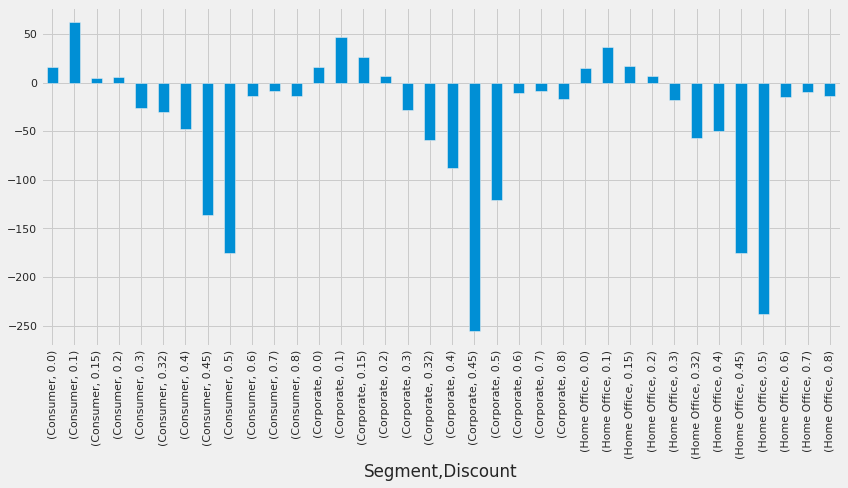

In [34]:
dis = data.groupby(['Segment','Discount']).Profit.median()
dis.plot(kind = 'bar', stacked = True)
plt.gcf().set_size_inches(12,7)
plt.tight_layout()

Observations


1. We should limit the sales of furniture and increase that of office supplies and technology as furtinute is generating very less profit as compared to its sales.
2. In the sub-gategories we are facing huge loss on the sale of tables so its sale should be minimized.
3. DIscount > 30% to the Segment, would result in loss whereas <30% is making profit


In [ ]:
#end